In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from math import sqrt

In [4]:
advertising_df = pd.read_csv('datasets/Advertising.csv', index_col=0)

In [13]:
advertising_df.loc[0:4]

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5


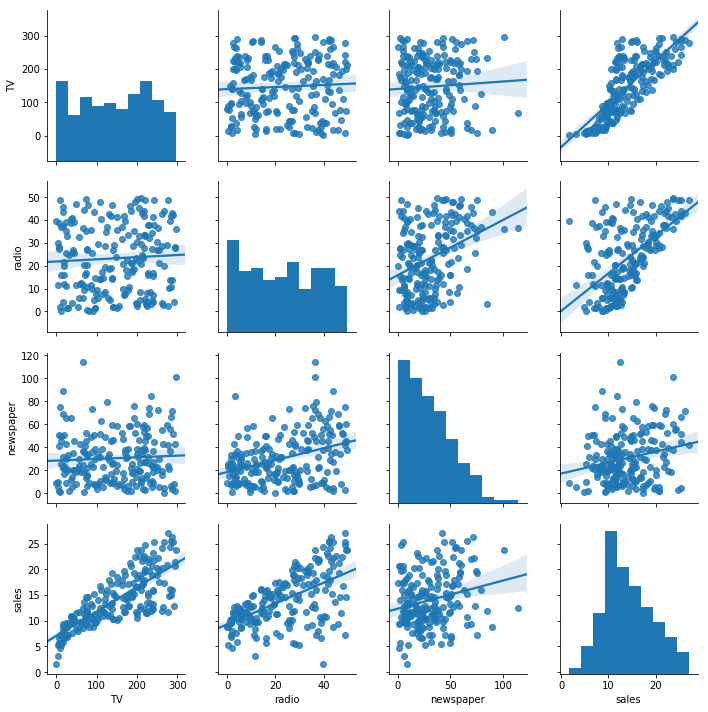

In [9]:
sns.pairplot(data=advertising_df,kind='reg')

In [15]:
mod = ols(formula='sales ~ TV', data=advertising_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           1.47e-42
Time:                        01:42:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

Esto dice que el intervalo de confianza del 95 % de $\beta_{0}$ es [6.130       7.935] lo que quiere decir que en ausencia de propaganda en TV las ventas se encontraran en ese intervalo.
Tambien dice que el intervalo de confianza del 95 % para $\beta_{1}$ es [0.042       0.053] lo que quiere decir que invirtiendo $1000 en TV se puede ganar entre [42,53] en ventas.

In [12]:
res.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Los p_values son bajisimos con lo cual se rechaza la hipotesis nula que los coheficientes son cero por la hipotesis alternativa que los coheficientes son distintos de cero.

In [23]:
sqrt(res.mse_total)

5.217456565710478

In [16]:
mod = ols(formula='sales ~ TV + radio + newspaper', data=advertising_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           1.58e-96
Time:                        01:42:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0